<a href="https://colab.research.google.com/github/RM-RAMASAMY/Data_preparation_eda_visualizatoin/blob/main/Timeseries_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Dataset

Gold has historically been viewed as a store of value, preserving wealth over long periods, especially during times of inflation, currency devaluation, or economic instability. Its limited supply and intrinsic value make it less susceptible to the fluctuations that impact fiat currencies and other assets. It’s seen as a hedge against uncertainties, providing stability when traditional assets (like stocks and bonds) are underperforming or at risk.

Central banks hold significant gold reserves as part of their foreign exchange reserves, reflecting the metal’s long-standing importance in the global financial system.

The data is a **time series dataset** with financial info for some market indices, commodities, economic indicators, and forex rates. Market indices and commodities are represented via the respective exchange-traded fund. It includes values from **2010 to 2024**.

In real-world applications, sometimes data will come in different granularities. In this dataset, we can find **daily, monthly, and trimonthly data**. Normalizing these inconsistencies and handling `NaN` values should be one of the first challenges when dealing with this dataset.

link to the dataset: https://www.kaggle.com/datasets/franciscogcc/financial-data



---

# Time series dataset with financial info for the following:

- **S&P 500** - SPDR S&P 500 ETF Trust  
- **Nasdaq 100** - Invesco QQQ ETF  
- **US Interest Rates** - Monthly federal rates  
- **CPI** - Consumer Price Index, monthly  
- **USD / CHF** - Forex rate  
- **EUR / USD** - Forex rate  
- **GDP** - Gross Domestic Product, trimonthly  
- **Silver** - abrdn Physical Silver Shares ETF  
- **Oil** - USO ETF  
- **Platinum** - abrdn Physical Platinum Shares ETF  
- **Palladium** - abrdn Physical Palladium Shares ETF  
- **Gold** - SPDR Gold Trust ETF  

Data obtained via **Alpha Vantage** and **FRED API** services.


In [13]:
# prompt: pull this https://www.kaggle.com/datasets/franciscogcc/financial-data

# Install the Kaggle API client.
!pip install kaggle

# Upload your Kaggle API credentials.
from google.colab import files
files.upload()

# Make sure the Kaggle API client is configured correctly.
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset.
!kaggle datasets download -d franciscogcc/financial-data

# Unzip the dataset.
!unzip financial-data.zip

Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
Dataset URL: https://www.kaggle.com/datasets/franciscogcc/financial-data
License(s): CC0-1.0
  0% 0.00/510k [00:00<?, ?B/s]
100% 510k/510k [00:00<00:00, 101MB/s]
Archive:  financial-data.zip
  inflating: financial_regression.csv  


In [32]:
import pandas as pd

# Load the dataset
df = pd.read_csv('financial_regression.csv')
dataset_copy = df

In [15]:
# Display the first few rows of the dataset
display(df.head())

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-01-14,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.520,46.22,...,45.02,43.86,44.84,364528.0,1.16,111.51,112.37,110.79,112.03,18305238.0
1,2010-01-15,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,45.65,...,45.76,44.40,45.76,442210.0,1.36,111.35,112.01,110.38,110.86,18000724.0
2,2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-19,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.640,45.95,...,47.08,45.70,46.94,629150.0,1.38,110.95,111.75,110.83,111.52,10467927.0
4,2010-01-20,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.604,45.43,...,47.31,45.17,47.05,643198.0,2.14,109.97,110.05,108.46,108.94,17534231.0


In [16]:
# Get basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3904 entries, 0 to 3903
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                3904 non-null   object 
 1   sp500 open          3719 non-null   float64
 2   sp500 high          3719 non-null   float64
 3   sp500 low           3719 non-null   float64
 4   sp500 close         3719 non-null   float64
 5   sp500 volume        3719 non-null   float64
 6   sp500 high-low      3719 non-null   float64
 7   nasdaq open         3719 non-null   float64
 8   nasdaq high         3719 non-null   float64
 9   nasdaq low          3719 non-null   float64
 10  nasdaq close        3719 non-null   float64
 11  nasdaq volume       3719 non-null   float64
 12  nasdaq high-low     3719 non-null   float64
 13  us_rates_%          176 non-null    float64
 14  CPI                 176 non-null    float64
 15  usd_chf             3694 non-null   float64
 16  eur_us

In [19]:
import pandas as pd

# Generate descriptive statistics
description = df.describe()

# Apply custom formatting
formatted_description = description.applymap(lambda x: '{:.2f}'.format(x) if isinstance(x, (int, float)) else x)

# Print the formatted output
print(formatted_description)

      sp500 open sp500 high sp500 low sp500 close  sp500 volume  \
count    3719.00    3719.00   3719.00     3719.00       3719.00   
mean      268.73     270.18    267.16      268.78  112420568.23   
std       121.37     122.02    120.66      121.39   69029012.54   
min       103.11     103.42    101.13      102.20     170817.00   
25%       169.71     170.18    169.03      169.65   66991123.00   
50%       241.18     242.08    239.45      240.61   92399074.00   
75%       374.46     377.80    371.05      374.25  136714558.00   
max       585.91     586.12    582.58      584.59  709504454.00   

      sp500 high-low nasdaq open nasdaq high nasdaq low nasdaq close  ...  \
count        3719.00     3719.00     3719.00    3719.00      3719.00  ...   
mean            3.02      181.39      182.69     179.98       181.43  ...   
std             2.66      122.47      123.39     121.44       122.47  ...   
min             0.30       42.67       42.82      41.55        42.47  ...   
25%        

<ipython-input-19-b1809e0f3ede>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_description = description.applymap(lambda x: '{:.2f}'.format(x) if isinstance(x, (int, float)) else x)


In [20]:
# Check for missing values
print(df.isnull().sum())

date                     0
sp500 open             185
sp500 high             185
sp500 low              185
sp500 close            185
sp500 volume           185
sp500 high-low         185
nasdaq open            185
nasdaq high            185
nasdaq low             185
nasdaq close           185
nasdaq volume          185
nasdaq high-low        185
us_rates_%            3728
CPI                   3728
usd_chf                210
eur_usd                210
GDP                   3847
silver open            185
silver high            185
silver low             185
silver close           185
silver volume          185
silver high-low        185
oil open               185
oil high               185
oil low                185
oil close              185
oil volume             185
oil high-low           185
platinum open          185
platinum high          185
platinum low           185
platinum close         185
platinum volume        185
platinum high-low      185
palladium open         185
p

In [23]:
# Convert 'Date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Resample data to daily frequency and fill NaN values using forward fill
df = df.set_index('date').resample('D').ffill()

# Handle remaining NaN values using linear interpolation
df = df.interpolate(method='linear')

# Verify if there are any remaining NaN values
print(df.isnull().sum())

# Now your DataFrame 'df' has daily data and NaN values are handled.

sp500 open             0
sp500 high             0
sp500 low              0
sp500 close            0
sp500 volume           0
sp500 high-low         0
nasdaq open            0
nasdaq high            0
nasdaq low             0
nasdaq close           0
nasdaq volume          0
nasdaq high-low        0
us_rates_%            18
CPI                   18
usd_chf                0
eur_usd                0
GDP                   77
silver open            0
silver high            0
silver low             0
silver close           0
silver volume          0
silver high-low        0
oil open               0
oil high               0
oil low                0
oil close              0
oil volume             0
oil high-low           0
platinum open          0
platinum high          0
platinum low           0
platinum close         0
platinum volume        0
platinum high-low      0
palladium open         0
palladium high         0
palladium low          0
palladium close        0
palladium volume       0


In [21]:
# Identify categorical and non-categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
non_categorical_cols = df.select_dtypes(exclude=['object']).columns.tolist()

print("Categorical Variables:")
print(categorical_cols)

print("\nNon-Categorical Variables:")
non_categorical_cols

Categorical Variables:
['date']

Non-Categorical Variables:


['sp500 open',
 'sp500 high',
 'sp500 low',
 'sp500 close',
 'sp500 volume',
 'sp500 high-low',
 'nasdaq open',
 'nasdaq high',
 'nasdaq low',
 'nasdaq close',
 'nasdaq volume',
 'nasdaq high-low',
 'us_rates_%',
 'CPI',
 'usd_chf',
 'eur_usd',
 'GDP',
 'silver open',
 'silver high',
 'silver low',
 'silver close',
 'silver volume',
 'silver high-low',
 'oil open',
 'oil high',
 'oil low',
 'oil close',
 'oil volume',
 'oil high-low',
 'platinum open',
 'platinum high',
 'platinum low',
 'platinum close',
 'platinum volume',
 'platinum high-low',
 'palladium open',
 'palladium high',
 'palladium low',
 'palladium close',
 'palladium volume',
 'palladium high-low',
 'gold open',
 'gold high',
 'gold low',
 'gold close',
 'gold volume']

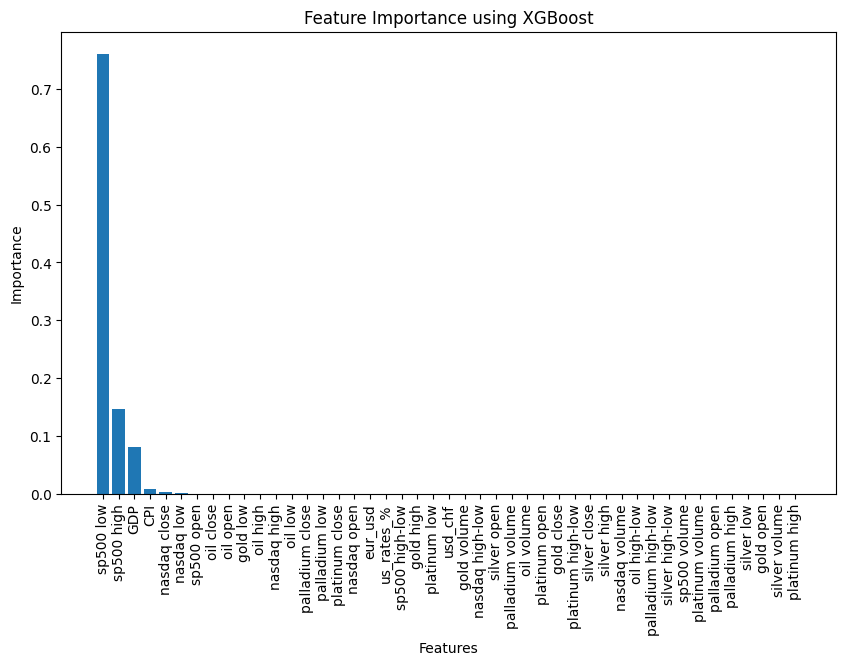

In [25]:
# prompt: plot the feature importance graph using xgboost with target variable as gold close

import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with daily data and handled NaN values.

# Define your features (X) and target variable (y)
X = df.drop('sp500 close', axis=1)
y = df['sp500 close']

# Create an XGBoost model
model = xgb.XGBRegressor()

# Train the model
model.fit(X, y)

# Get feature importance
importance = model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance using XGBoost')
plt.xticks(rotation=90)
plt.show()

count    5397.000000
mean      268.771764
std       121.374108
min       102.200000
25%       169.610000
50%       240.700000
75%       374.130000
max       584.590000
Name: sp500 close, dtype: float64


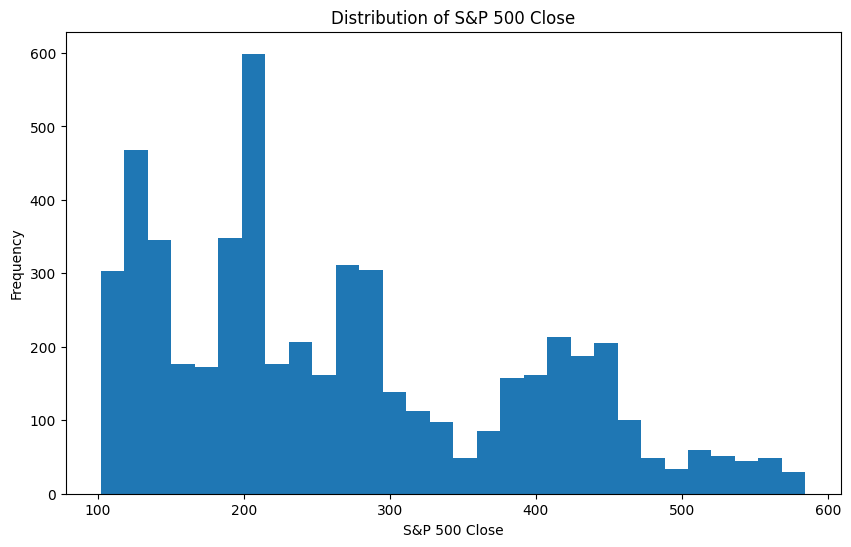

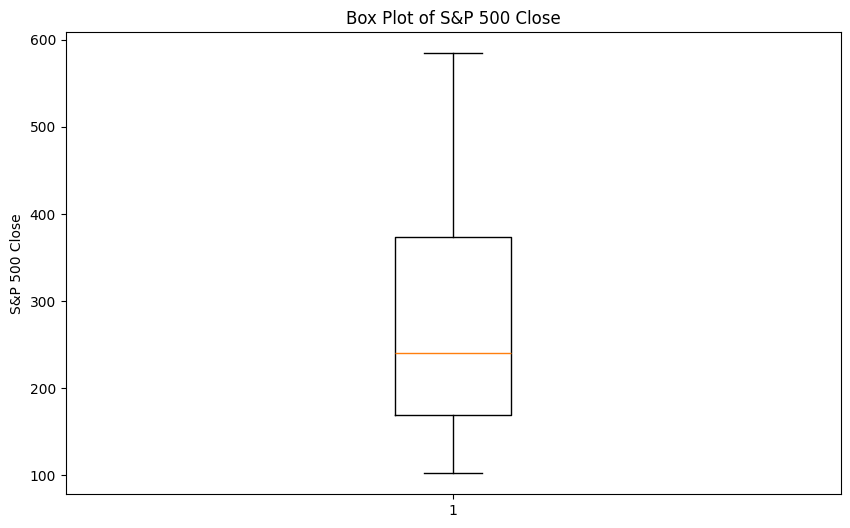

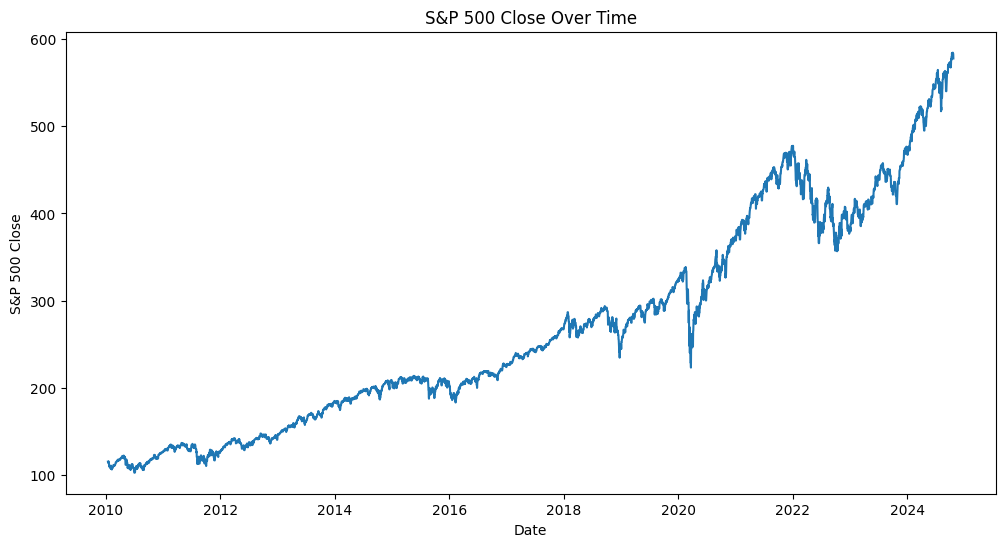

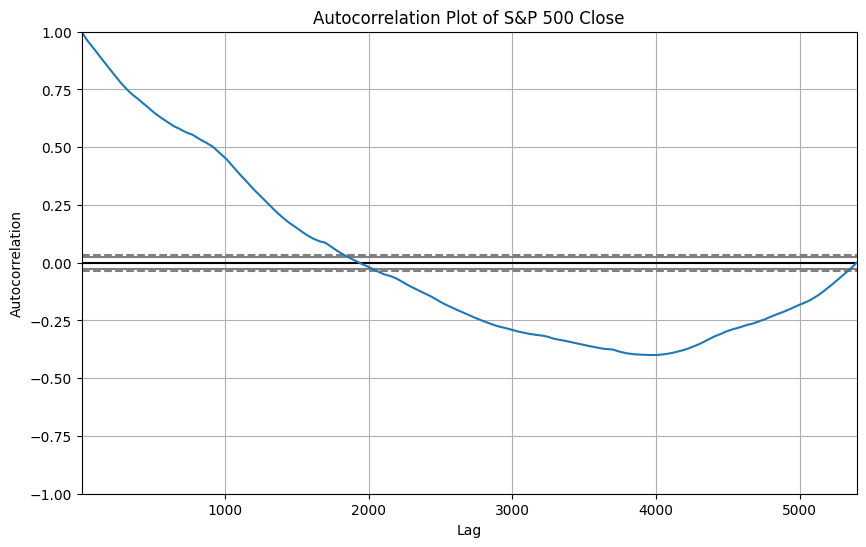

In [27]:
# Summary statistics
print(df['sp500 close'].describe())

# Distribution plot
plt.figure(figsize=(10, 6))
plt.hist(df['sp500 close'], bins=30)
plt.xlabel('S&P 500 Close')
plt.ylabel('Frequency')
plt.title('Distribution of S&P 500 Close')
plt.show()

# Box plot to identify outliers
plt.figure(figsize=(10, 6))
plt.boxplot(df['sp500 close'])
plt.ylabel('S&P 500 Close')
plt.title('Box Plot of S&P 500 Close')
plt.show()

# Time series plot
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['sp500 close'])
plt.xlabel('Date')
plt.ylabel('S&P 500 Close')
plt.title('S&P 500 Close Over Time')
plt.show()

# Autocorrelation plot (to check for seasonality/trends)
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10, 6))
autocorrelation_plot(df['sp500 close'])
plt.title('Autocorrelation Plot of S&P 500 Close')
plt.show()

### Basic Information ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3904 entries, 0 to 3903
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                3904 non-null   object 
 1   sp500 open          3719 non-null   float64
 2   sp500 high          3719 non-null   float64
 3   sp500 low           3719 non-null   float64
 4   sp500 close         3719 non-null   float64
 5   sp500 volume        3719 non-null   float64
 6   sp500 high-low      3719 non-null   float64
 7   nasdaq open         3719 non-null   float64
 8   nasdaq high         3719 non-null   float64
 9   nasdaq low          3719 non-null   float64
 10  nasdaq close        3719 non-null   float64
 11  nasdaq volume       3719 non-null   float64
 12  nasdaq high-low     3719 non-null   float64
 13  us_rates_%          176 non-null    float64
 14  CPI                 176 non-null    float64
 15  usd_chf             3694 non-

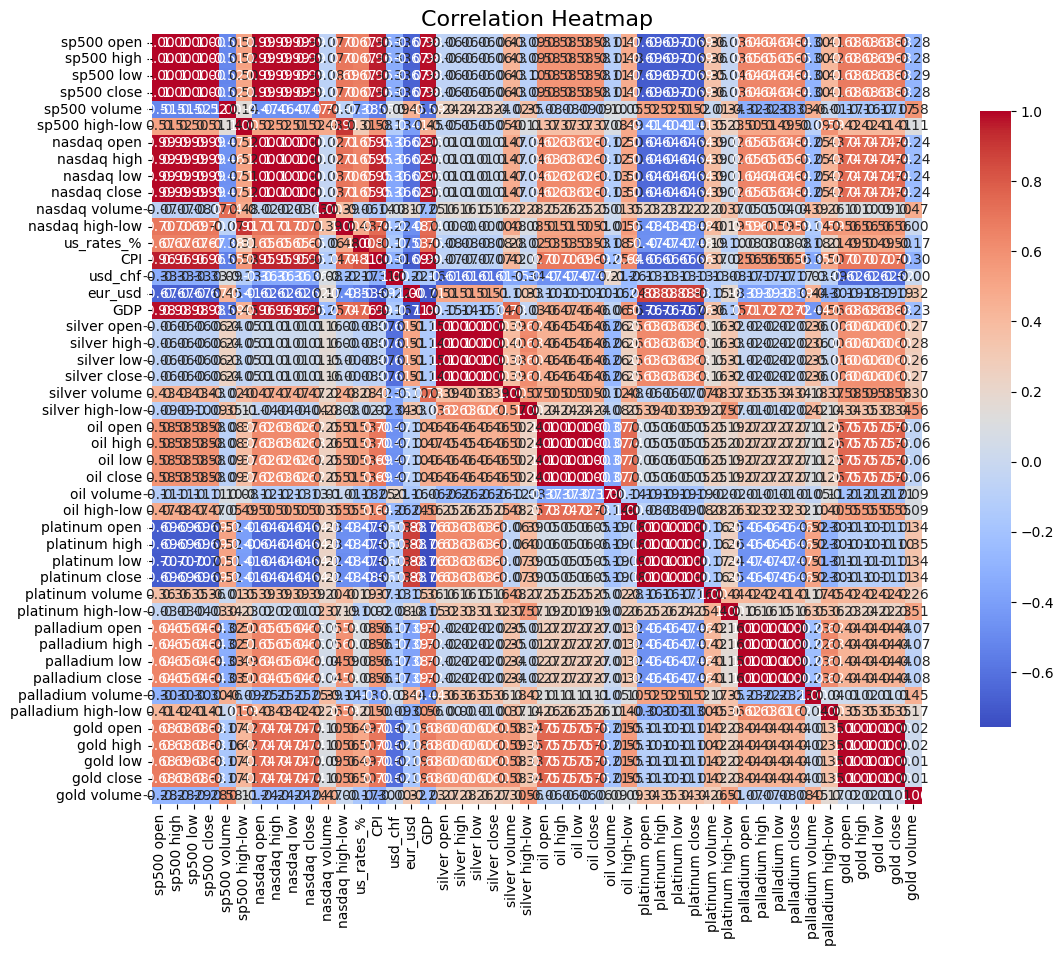

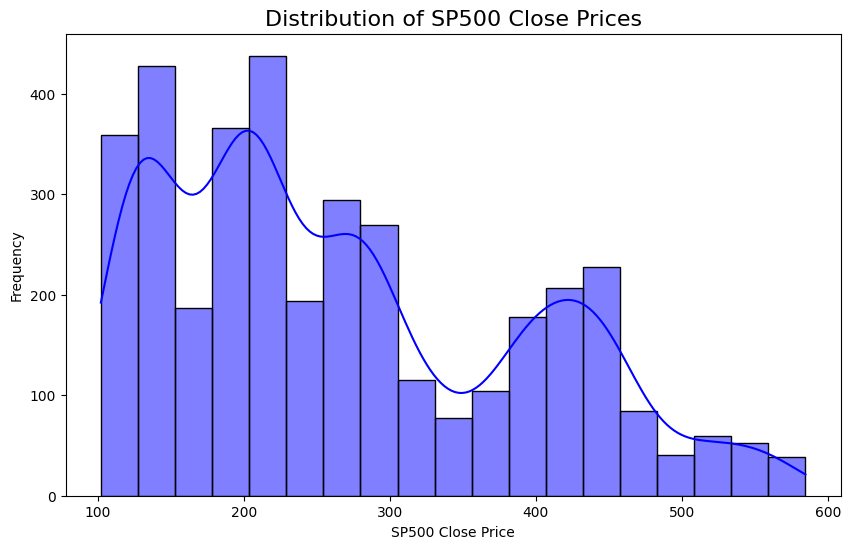

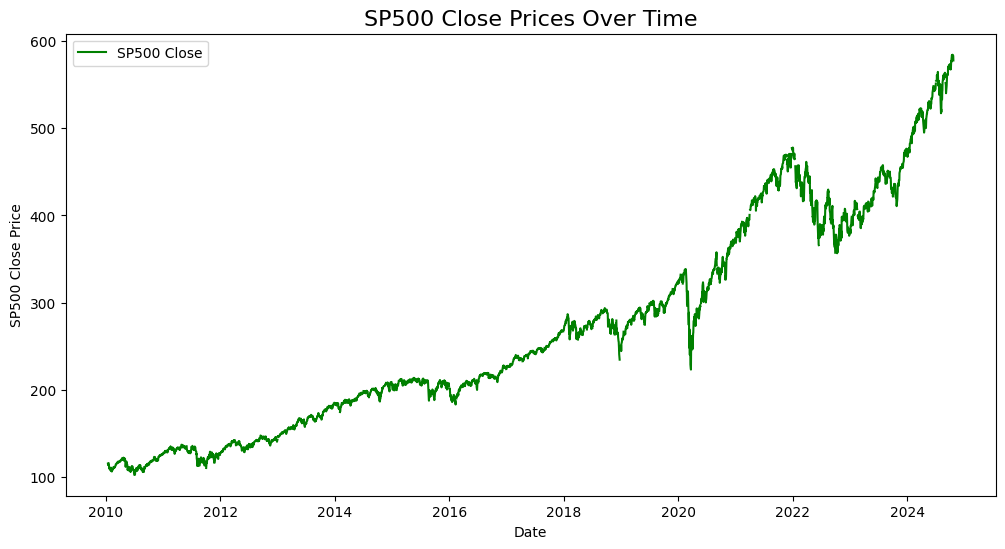

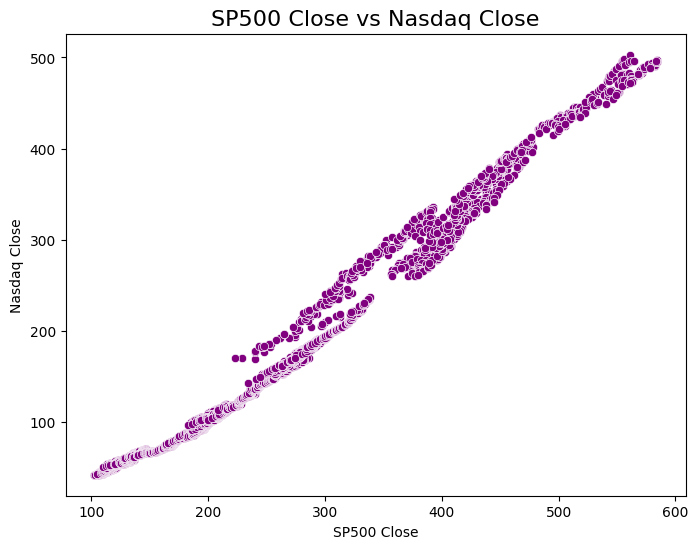

Remaining missing values after cleaning: 0

### Data after Preparation ###
        date  sp500 open  sp500 high  sp500 low  sp500 close  sp500 volume  \
4 2010-01-20      114.28      114.45     112.98       113.89   216330645.0   
5 2010-01-21      113.92      114.27     111.56       111.70   344747028.0   
6 2010-01-22      111.20      111.74     109.09       109.21   345627282.0   
7 2010-01-25      110.21      110.41     109.41       109.77   186751367.0   
8 2010-01-26      109.34      110.47     109.04       109.31   210788669.0   

   sp500 high-low  nasdaq open  nasdaq high  nasdaq low  ...  gold high  \
4            1.47        46.27       46.604       45.43  ...     110.05   
5            2.71        46.06       46.350       45.30  ...     108.78   
6            2.65        45.34       45.480       44.04  ...     107.68   
7            1.00        44.39       44.600       44.12  ...     107.72   
8            1.43        44.28       44.890       44.05  ...     107.99   

   go

In [35]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'financial_regression.csv'  # Update with the correct file path if needed
data = pd.read_csv(file_path)

# 1. Detailed EDA
print("### Basic Information ###")
print(data.info())  # Basic info about the dataset

print("\n### Summary Statistics ###")
print(data.describe(include='all'))  # Summary statistics for all columns

print("\n### Missing Values ###")
missing_values = data.isnull().sum().sort_values(ascending=False)
percent_missing = (data.isnull().sum() / data.isnull().count() * 100).sort_values(ascending=False)
missing_data = pd.concat([missing_values, percent_missing], axis=1, keys=['Total', 'Percent'])
print(missing_data)

# 2. Data Visualization
# Exclude non-numeric columns (like 'date') for correlation calculation
numeric_data = data.select_dtypes(include=[np.number])

# Correlation Heatmap
plt.figure(figsize=(15, 10))
correlation_matrix = numeric_data.corr()  # Calculate correlation only on numeric data
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={'shrink': .8})
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# Distribution of SP500 Close Prices
plt.figure(figsize=(10, 6))
sns.histplot(data['sp500 close'].dropna(), kde=True, color='blue')
plt.title('Distribution of SP500 Close Prices', fontsize=16)
plt.xlabel('SP500 Close Price')
plt.ylabel('Frequency')
plt.show()

# Time Series Plot for SP500 Close Prices
data['date'] = pd.to_datetime(data['date'], errors='coerce')
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['sp500 close'], label='SP500 Close', color='green')
plt.title('SP500 Close Prices Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('SP500 Close Price')
plt.legend()
plt.show()

# Scatter Plot: SP500 Close vs Nasdaq Close
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['sp500 close'], y=data['nasdaq close'], color='purple')
plt.title('SP500 Close vs Nasdaq Close', fontsize=16)
plt.xlabel('SP500 Close')
plt.ylabel('Nasdaq Close')
plt.show()

# 3. Data Cleaning

# Fill missing numeric values with mean for each column
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].apply(lambda x: x.fillna(x.mean()), axis=0)

# Convert 'date' column to datetime format and handle missing values in date
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Check if there are any remaining missing values after cleaning
remaining_missing = data.isnull().sum().sum()
print(f"Remaining missing values after cleaning: {remaining_missing}")

# 4. Data Preparation

# Create rolling averages for key columns (e.g., SP500, Nasdaq, Gold)
data['sp500_rolling_mean'] = data['sp500 close'].rolling(window=5).mean()
data['nasdaq_rolling_mean'] = data['nasdaq close'].rolling(window=5).mean()
data['gold_rolling_mean'] = data['gold close'].rolling(window=5).mean()

# Create new features based on existing ones (e.g., percentage change)
data['sp500_pct_change'] = data['sp500 close'].pct_change() * 100
data['nasdaq_pct_change'] = data['nasdaq close'].pct_change() * 100
data['gold_pct_change'] = data['gold close'].pct_change() * 100

# Drop rows with NaN values in the new rolling mean columns (if needed)
data.dropna(subset=['sp500_rolling_mean', 'nasdaq_rolling_mean', 'gold_rolling_mean'], inplace=True)

# Display the first few rows after preparation
print("\n### Data after Preparation ###")
print(data.head())


In [36]:
!python -m pip install --upgrade pip >/dev/null 2>&1
!pip install autogluon >/dev/null 2>&1

In [38]:
!pip install --upgrade scikit-learn >/dev/null 2>&1
!pip install --upgrade pandas >/dev/null 2>&1

In [39]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [40]:
# prompt: split the data into train and test and save it as csv files

from sklearn.model_selection import train_test_split

# Assuming X and y are defined as before
X = df.drop('sp500 close', axis=1)
y = df['sp500 close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save the training data to a CSV file
train_data = pd.concat([X_train, y_train], axis=1)
train_data.to_csv('train.csv', index=False)

# Save the testing data to a CSV file
test_data = pd.concat([X_test, y_test], axis=1)
test_data.to_csv('test.csv', index=False)

In [42]:
train_data = TabularDataset(f'train.csv')
train_data.head()

,date,sp500 open,sp500 high,sp500 low,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,nasdaq close,...,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume,sp500 close
0,2013-02-04,150.32,151.27,149.43,158901804.0,1.84,67.25,67.4599,66.46,66.480,...,73.5500,74.5000,202548.0,1.1000,161.19,162.42,161.15,162.00,7354084.0,149.54
1,2010-12-23,125.64,125.78,125.29,70052157.0,0.49,54.78,54.8700,54.61,54.742,...,74.0101,74.9600,86329.0,1.3389,134.26,134.90,133.93,134.66,8700716.0,125.60
2,2021-03-22,390.03,394.07,389.97,73778646.0,4.10,315.21,320.7400,315.21,318.610,...,242.5900,244.6300,23136.0,5.4100,162.27,163.13,162.16,163.00,5239970.0,392.59
3,2019-12-13,316.87,318.67,316.02,81489263.0,2.65,206.40,207.9100,205.96,207.190,...,180.1800,181.9000,56861.0,6.4700,138.52,139.21,137.98,139.05,6964255.0,317.32
4,2018-11-13,273.09,275.33,271.25,98176610.0,4.08,167.11,169.4800,166.00,166.470,...,104.9040,105.3155,4702.0,0.8359,113.72,113.93,113.42,113.70,9309074.0,272.06


In [43]:
label = 'sp500 close'
train_data[label].describe()

,sp500 close
count,2970.000000
mean,270.152926
std,121.417806
min,102.200000
25%,170.972500
50%,243.050000
75%,377.840000
max,584.590000


In [45]:
# prompt: drop recods in train_data if the label col has any of the values of Nan, Inf or Ninf

train_data = train_data.dropna(subset=['sp500 close'])
train_data = train_data[~train_data['sp500 close'].isin([np.inf, -np.inf])]

In [46]:
predictor = TabularPredictor(label=label).fit(train_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20241120_195235"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.82 GB / 12.67 GB (85.4%)
Disk Space Avail:   65.80 GB / 107.72 GB (61.1%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : F

[1000]	valid_set's rmse: 2.95136
[2000]	valid_set's rmse: 2.90746
[3000]	valid_set's rmse: 2.89682
[4000]	valid_set's rmse: 2.89374
[5000]	valid_set's rmse: 2.8929
[6000]	valid_set's rmse: 2.89263
[7000]	valid_set's rmse: 2.89243
[8000]	valid_set's rmse: 2.89232
[9000]	valid_set's rmse: 2.89227
[10000]	valid_set's rmse: 2.89225


	-2.8923	 = Validation score   (-root_mean_squared_error)
	30.22s	 = Training   runtime
	1.03s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 1.70747
[2000]	valid_set's rmse: 1.70209


	-1.7019	 = Validation score   (-root_mean_squared_error)
	10.2s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-1.5801	 = Validation score   (-root_mean_squared_error)
	22.27s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: CatBoost ...
	-3.0298	 = Validation score   (-root_mean_squared_error)
	247.15s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-1.581	 = Validation score   (-root_mean_squared_error)
	7.16s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-6.061	 = Validation score   (-root_mean_squared_error)
	4.46s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGBoost ...
	-1.7516	 = Validation score   (-root_mean_squared_error)
	4.75s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-5.4351	 = Validation score   (-root_mean_squared_error)
	11.64s	 = Training   runtime
	0.02s	 = Validation runt

In [48]:
test_data = TabularDataset(f'test.csv')

y_pred = predictor.predict(test_data.drop(columns=[label]))
y_pred.head()

Loaded data from: test.csv | Columns = 47 / 47 | Rows = 781 -> 781


,sp500 close
0,236.734497
1,337.919098
2,242.534027
3,267.612671
4,208.070679


In [50]:
# prompt: prompt: drop recods in test_data if the label col has any of the values of Nan, Inf or Ninf

test_data = test_data.dropna(subset=['sp500 close'])
test_data = test_data[~test_data['sp500 close'].isin([np.inf, -np.inf])]

In [51]:
predictor.evaluate(test_data, silent=True)

{'root_mean_squared_error': -1.4459330456402175,
 'mean_squared_error': -2.0907223724743953,
 'mean_absolute_error': -0.9314317670142223,
 'r2': 0.9998575420024183,
 'pearsonr': 0.9999288254600124,
 'median_absolute_error': -0.5464779663086006}

In [53]:
predictor.leaderboard(test_data)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-1.445933,-1.542260,root_mean_squared_error,0.610823,0.331345,44.399118,0.003987,0.000899,0.019006,2,True,12
1,ExtraTreesMSE,-1.454638,-1.580990,root_mean_squared_error,0.164621,0.096726,7.155356,0.164621,0.096726,7.155356,1,True,7
2,RandomForestMSE,-1.512932,-1.580119,root_mean_squared_error,0.187311,0.096442,22.270759,0.187311,0.096442,22.270759,1,True,5
3,LightGBMLarge,-1.613829,-1.714168,root_mean_squared_error,0.064596,0.020311,11.584524,0.064596,0.020311,11.584524,1,True,11
4,LightGBM,-1.698923,-1.701860,root_mean_squared_error,0.235908,0.129094,10.203517,0.235908,0.129094,10.203517,1,True,4
5,XGBoost,-1.762843,-1.751577,root_mean_squared_error,0.018996,0.008185,4.750479,0.018996,0.008185,4.750479,1,True,9
6,LightGBMXT,-2.656524,-2.892251,root_mean_squared_error,1.949357,1.026401,30.221742,1.949357,1.026401,30.221742,1,True,3
7,CatBoost,-2.682925,-3.029779,root_mean_squared_error,0.046798,0.009325,247.151686,0.046798,0.009325,247.151686,1,True,6
8,KNeighborsDist,-2.797877,-3.032262,root_mean_squared_error,0.023788,0.034849,0.040123,0.023788,0.034849,0.040123,1,True,2
9,KNeighborsUnif,-3.176015,-3.271978,root_mean_squared_error,0.022952,0.190024,4.176547,0.022952,0.190024,4.176547,1,True,1
